# 第一题

In [23]:
import pandas as pd
data=pd.read_excel('sz50.xlsx',sheet_name=None, index_col='datetime')

In [24]:
data.keys( )

odict_keys(['600000.XSHG', '600016.XSHG', '600028.XSHG', '600029.XSHG', '600030.XSHG', '600036.XSHG', '600048.XSHG', '600050.XSHG', '600100.XSHG', '600104.XSHG', '600111.XSHG', '600340.XSHG', '600485.XSHG', '600518.XSHG', '600519.XSHG', '600547.XSHG', '600606.XSHG', '600837.XSHG', '600887.XSHG', '600919.XSHG', '600958.XSHG', '600999.XSHG', '601006.XSHG', '601088.XSHG', '601166.XSHG', '601169.XSHG', '601186.XSHG', '601198.XSHG', '601211.XSHG', '601229.XSHG', '601288.XSHG', '601318.XSHG', '601328.XSHG', '601336.XSHG', '601390.XSHG', '601398.XSHG', '601601.XSHG', '601628.XSHG', '601668.XSHG', '601688.XSHG', '601766.XSHG', '601788.XSHG', '601800.XSHG', '601818.XSHG', '601857.XSHG', '601881.XSHG', '601901.XSHG', '601985.XSHG', '601988.XSHG', '601989.XSHG'])

# 第二题

In [25]:
import numpy as np
import talib as ta
df=pd.DataFrame(date["600036.XSHG"])
close=df['close'].values
close_MA10=ta.MA((close), timeperiod=10)
print(type(close_MA10))
print(close_MA10[-5:])

<class 'numpy.ndarray'>
[108.35  108.741 109.176 110.102 111.666]


# 第三题

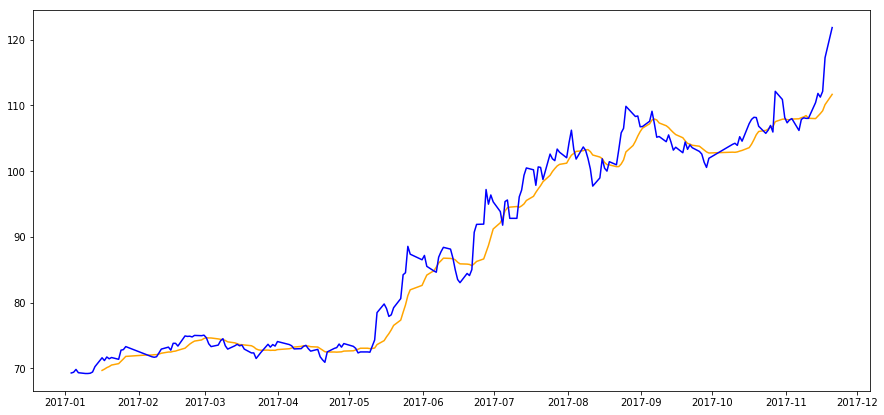

In [13]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
data = pd.read_excel('sz50.xlsx', sheet_name = '600036.XSHG', index_col = 'datetime')
res = ta.MA(data.close.values, 10)
close = pd.Series(res, index = data.close.index)
plt.figure(figsize=(15, 7))
plt.plot(close, color = 'orange')
plt.plot(data.close, color = 'blue')
plt.show()

# 第四题

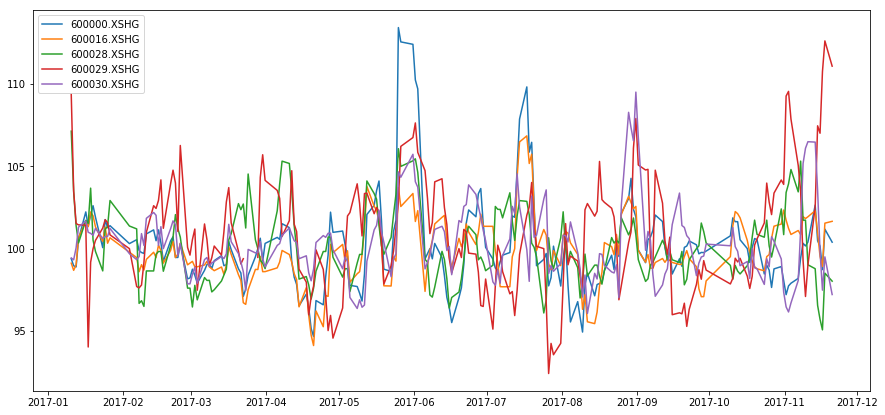

In [14]:
import numpy as np
import talib as ta
import matplotlib.pyplot as plt

data= pd.read_excel('sz50.xlsx',sheet_name= None, index_col='datetime')
plt.figure(figsize=(15, 7))
new_dict = {}
for key,value in data.items():
    try:
        index = value.index
        new_dict[key] = pd.Series(ta.ROCR100(value.close.values, timeperiod = 5), index = index)
    except AttributeError:
        pass 

df = pd.DataFrame(new_dict)
list = df.columns.values.tolist()
for i in range(5):
    plt.plot(df[list[i]],label=list[i])
plt.legend()
plt.show()

# 第五题

In [27]:
data_dict = {}
for s in data.keys():
    if s != '600485.XSHG':
        stock =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
        data_dict[s] = stock.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
import talib.abstract as ta
df_ma = pd.DataFrame({name: ta.MA(value, 5) for name, value in PN.iteritems()})
pn_macd = pd.Panel({name: ta.MACD(value) for name, value in PN.iteritems()})
df_macd = pn_macd.transpose(2,1,0).to_frame()
print(df_macd)

                                       macd  macdsignal   macdhist
datetime            minor                                         
2017-02-24 15:00:00 600000.XSHG    0.871114    1.197907  -0.326792
                    600016.XSHG   -0.007077    0.265328  -0.272405
                    600028.XSHG    0.028081    0.052015  -0.023934
                    600029.XSHG    0.221787    0.132200   0.089587
                    600030.XSHG    0.602873    0.620235  -0.017362
                    600036.XSHG    1.291055    1.245643   0.045412
                    600048.XSHG    2.316978    1.771997   0.544982
                    600050.XSHG   -0.105248   -0.189278   0.084029
                    600100.XSHG    0.453028    0.079491   0.373537
                    600104.XSHG    2.271146    2.012658   0.258488
                    600111.XSHG    2.429090    1.926561   0.502529
                    600340.XSHG    8.025312    5.194384   2.830927
                    600518.XSHG    1.014290    2.387216  -1.37